# Practice Excercise

Name - Purusharth Malik
Registration No. - 2348542

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('data - data.csv')
df.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  02-05-2014 0:00   313000.0         3       1.50         1340      7912   
1  02-05-2014 0:00  2384000.0         5       2.50         3650      9050   
2  02-05-2014 0:00   342000.0         3       2.00         1930     11947   
3  02-05-2014 0:00   420000.0         3       2.25         2000      8030   
4  02-05-2014 0:00   550000.0         4       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [14]:
df_new = df.copy()
df_new2 = df.copy()

In [4]:
df.describe()

price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   862.168977   
min       1.000000     0.000000     0.000000     1.000000   370.000000   
25%       1.000000     0.000000     0.000000     3.000000  1190.000000   
50%       1.500000     0.000000     0.000000     3.000000  1590.000000   
75%       2.000000     0.000000     0.000000     4.000000  2300.000000   
max       3.500000     1.000000     4.000000     5.000000  9410.000000   

       sqft_basement     yr_built  yr_renovated  
count    4600.000000  4600.000000   4600.000000  
mean      312.081522  1970.786304    808.608261  
std       464.137228    29.731848    979.414536  
min         0.000000  1900.000000      0.000000  
25%         0.000000  1951.000000      0.000000  
50%         0.000000  1976.000000      0.000000  
75%       610.000000  1997.000000   1999.000000  
max      4820.000000  2014.000000   2014.000000

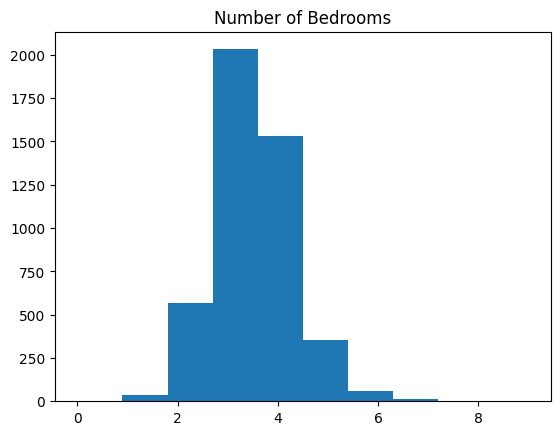

In [67]:
#plotting the number of bedrooms
plt.hist(df.bedrooms)
plt.title('Number of Bedrooms')
plt.show()

C:\Users\purus\Anaconda3\envs\dragon\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


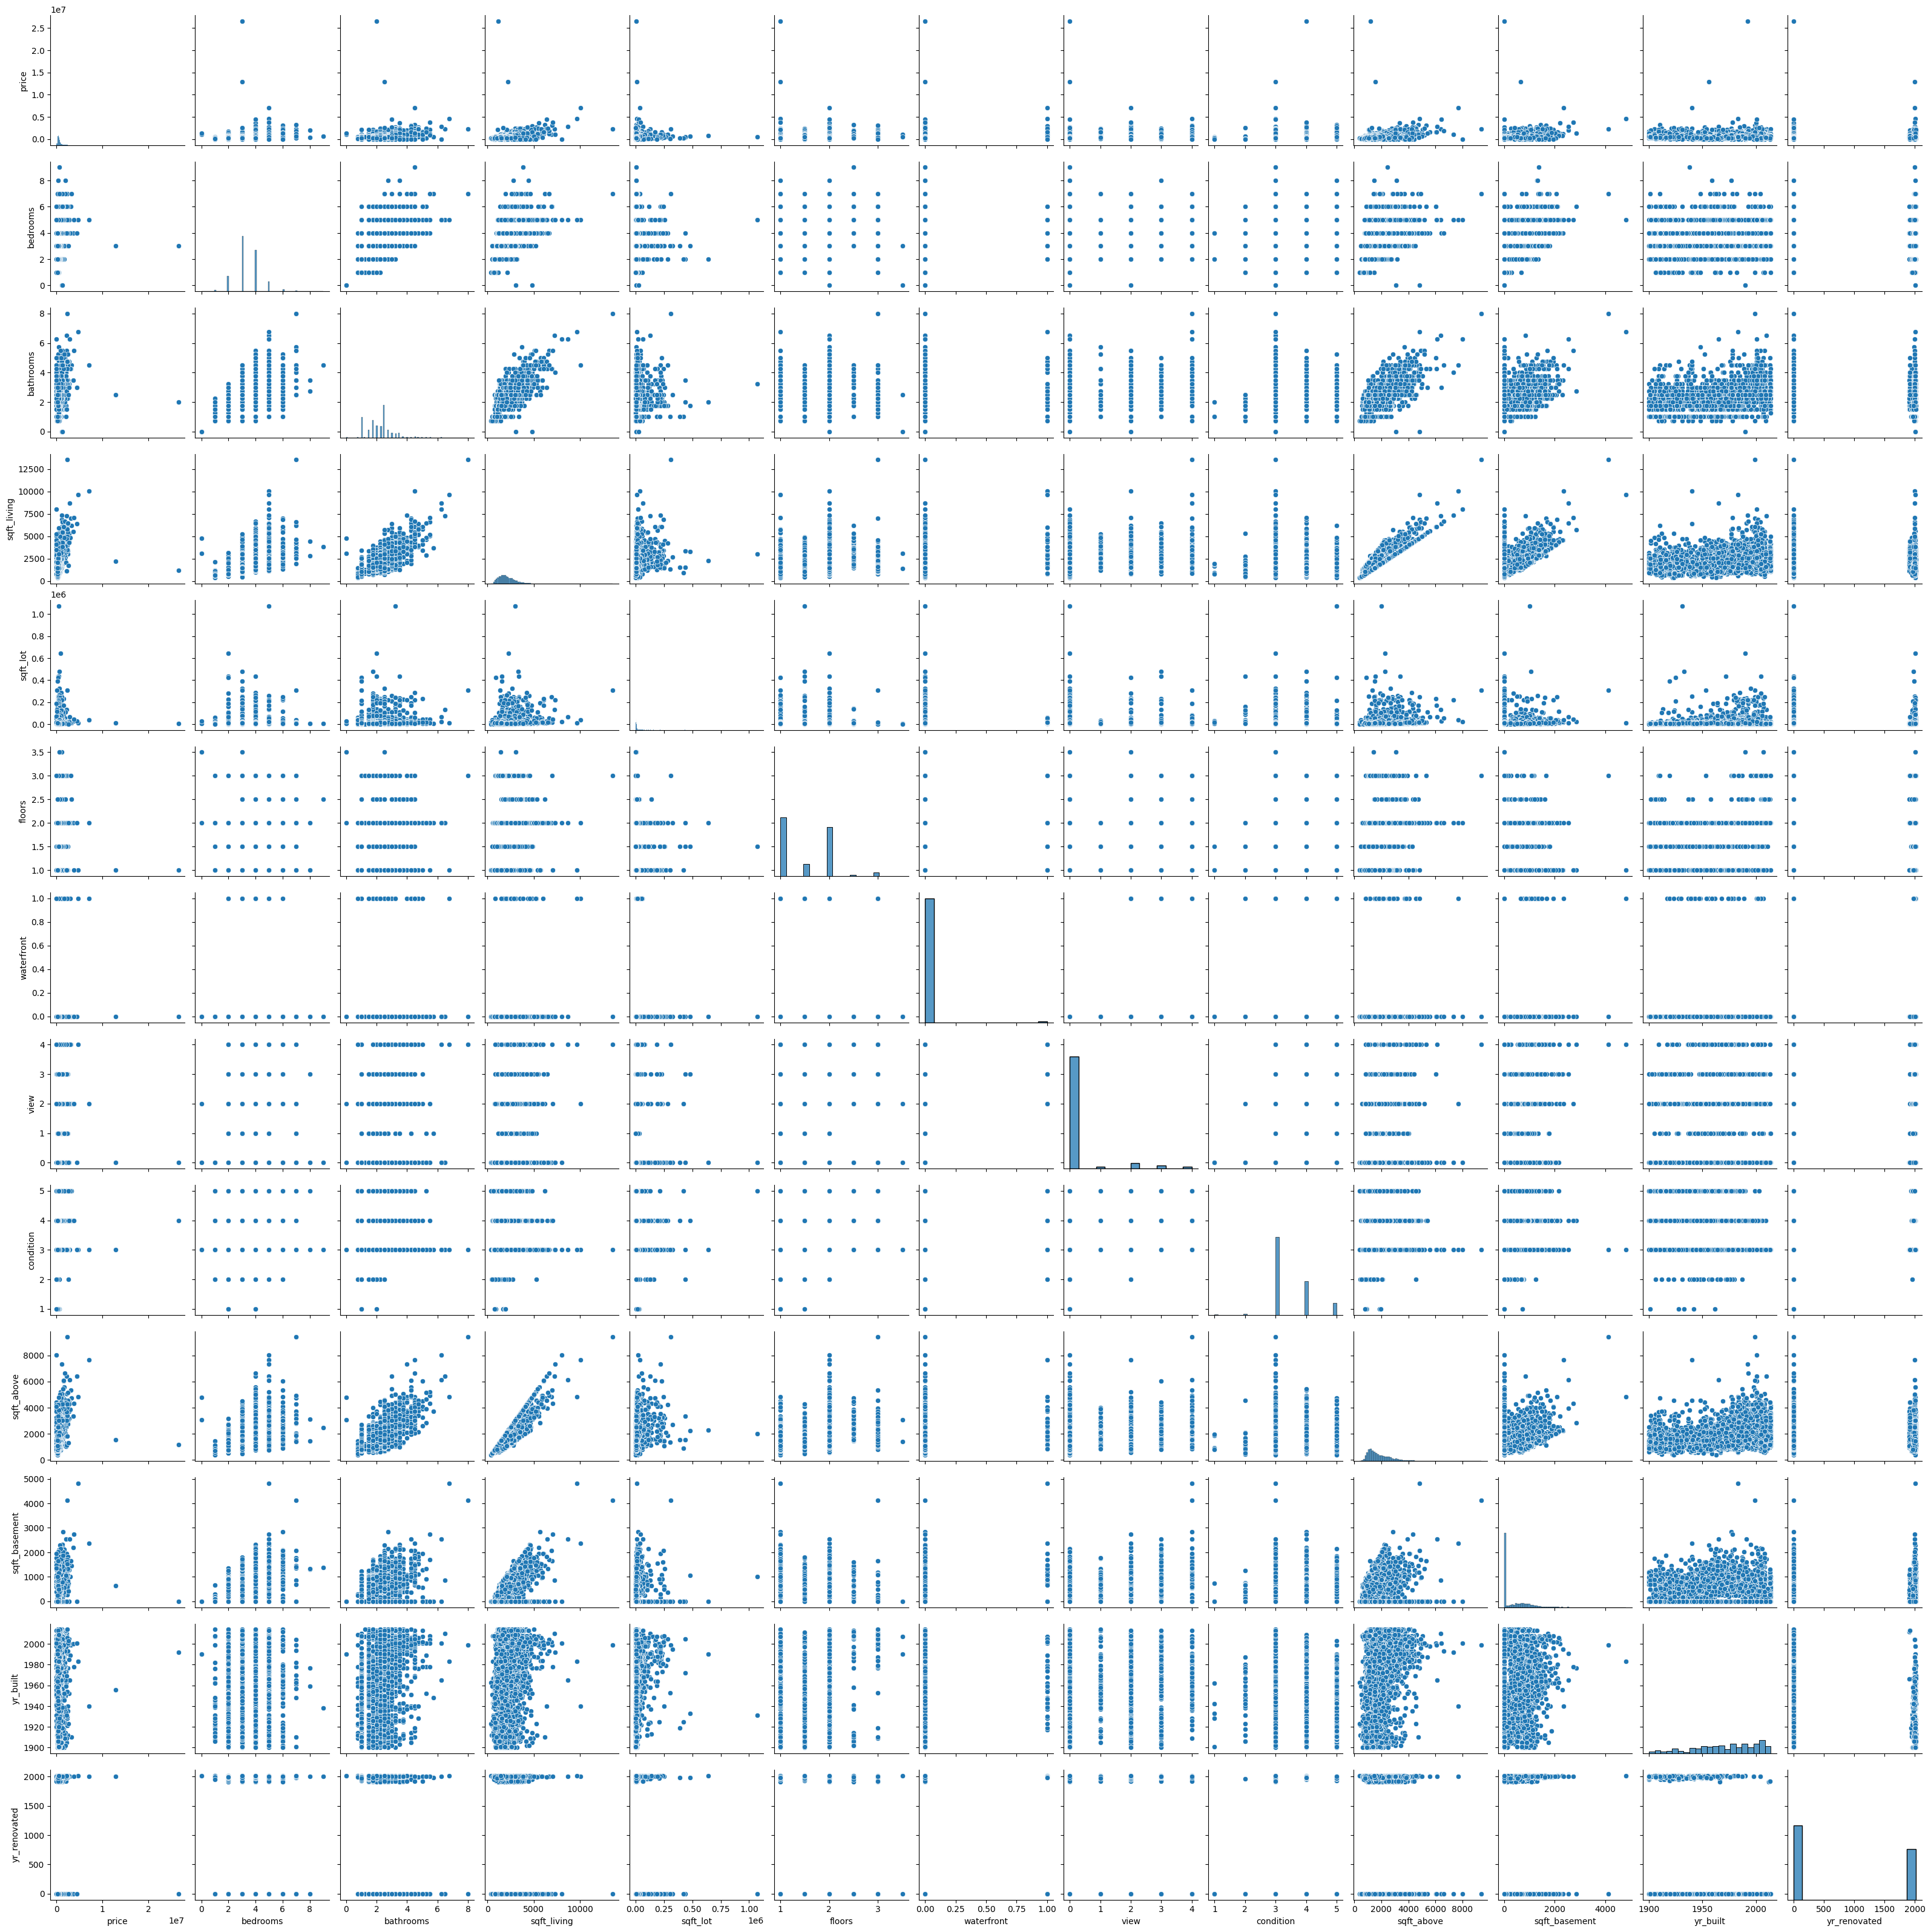

In [9]:
#pair-plot
sns.pairplot(df)

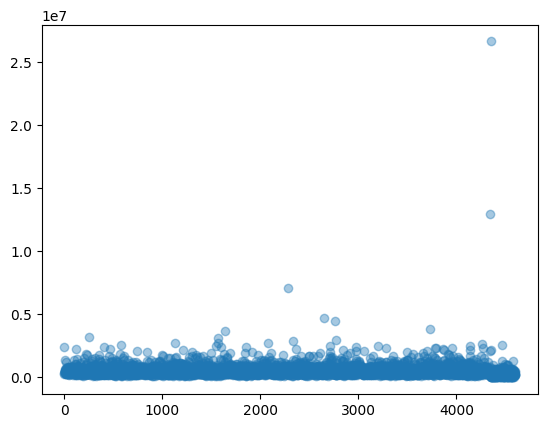

In [68]:
#plotting the target variable
plt.scatter(y=df.price, x=df.index, alpha=0.4)

Clearly, there are a couple of outliers but we will look at them using z-score standardization later on.

## Binning

In [69]:
df.yr_built = pd.cut(df.yr_built, 
                     bins = [1900, 1920, 1940, 1960, 1980, 2000, 2020])

In [70]:
df.yr_built

0       (1940, 1960]
1       (1920, 1940]
2       (1960, 1980]
3       (1960, 1980]
4       (1960, 1980]
            ...     
4595    (1940, 1960]
4596    (1980, 2000]
4597    (2000, 2020]
4598    (1960, 1980]
4599    (1980, 2000]
Name: yr_built, Length: 4600, dtype: category
Categories (6, interval[int64, right]): [(1900, 1920] < (1920, 1940] < (1940, 1960] < (1960, 1980] < (1980, 2000] < (2000, 2020]]

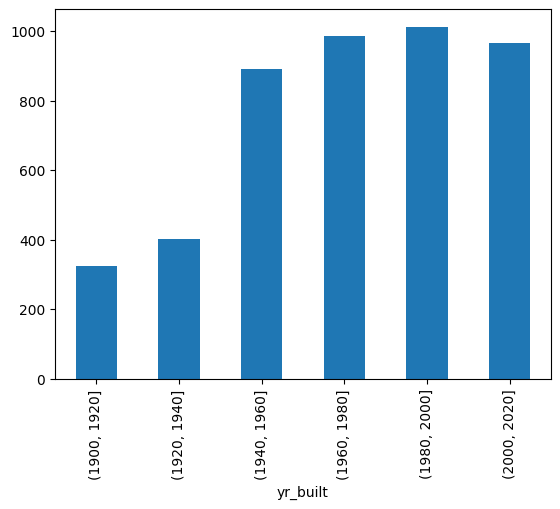

In [71]:
df.yr_built.value_counts().sort_index().plot(kind='bar')
plt.show()

In [72]:
df.sqft_above = pd.cut(df.sqft_above, 
                       bins=[100, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000])

In [73]:
df.sqft_above

0       (1000, 2000]
1       (3000, 4000]
2       (1000, 2000]
3        (100, 1000]
4       (1000, 2000]
            ...     
4595    (1000, 2000]
4596    (1000, 2000]
4597    (3000, 4000]
4598    (1000, 2000]
4599    (1000, 2000]
Name: sqft_above, Length: 4600, dtype: category
Categories (10, interval[int64, right]): [(100, 1000] < (1000, 2000] < (2000, 3000] < (3000, 4000] ... (6000, 7000] < (7000, 8000] < (8000, 9000] < (9000, 10000]]

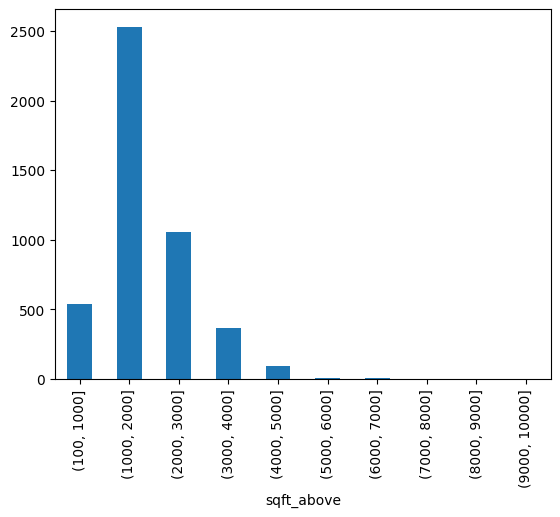

In [74]:
df.sqft_above.value_counts().sort_index().plot(kind='bar')
plt.show()

## Normalizing the attributes

In [15]:
#getting all the numerical attributes
numerical_atts = []
for col, tp in zip(df.columns, df.dtypes):
    if tp in (np.float64, np.int64):
        numerical_atts.append(col)
        
numerical_atts

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated']

In [17]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
df[numerical_atts] = pt.fit_transform(df[numerical_atts])

In [18]:
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  02-05-2014 0:00 -0.620846 -0.401735  -0.828786    -0.876706  0.053381   
1  02-05-2014 0:00  3.314654  1.678688   0.500975     1.466042  0.204963   
2  02-05-2014 0:00 -0.502569 -0.401735  -0.126969    -0.033902  0.506690   
3  02-05-2014 0:00 -0.213320 -0.401735   0.195021     0.049019  0.070262   
4  02-05-2014 0:00  0.200437  0.688242   0.500975    -0.021881  0.368322   

     floors  waterfront      view  condition  sqft_above  sqft_basement  \
0  0.204461   -0.085004 -0.333333  -0.641471   -0.452664      -0.820138   
1  0.989424   -0.085004  3.001639   1.965682    1.562572       1.072648   
2 -1.010986   -0.085004 -0.333333   0.908991    0.395222      -0.820138   
3 -1.010986   -0.085004 -0.333333   0.908991   -1.185227       1.284536   
4 -1.010986   -0.085004 -0.333333   0.908991   -0.851262       1.250952   

   yr_built  yr_renovated                    street       city  statezip  \
0 -0.645785      1.211746      18810 Densmore Ave N  Shoreline  WA 98133   
1 -1.529910     -0.825773           709 W Blaine St    Seattle  WA 98119   
2 -0.296406     -0.825773  26206-26214 143rd Ave SE       Kent  WA 98042   
3 -0.395140     -0.825773           857 170th Pl NE   Bellevue  WA 98008   
4  0.052531      1.210823         9105 170th Ave NE    Redmond  WA 98052   

  country  
0     USA  
1     USA  
2     USA  
3     USA  
4     USA

C:\Users\purus\Anaconda3\envs\dragon\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


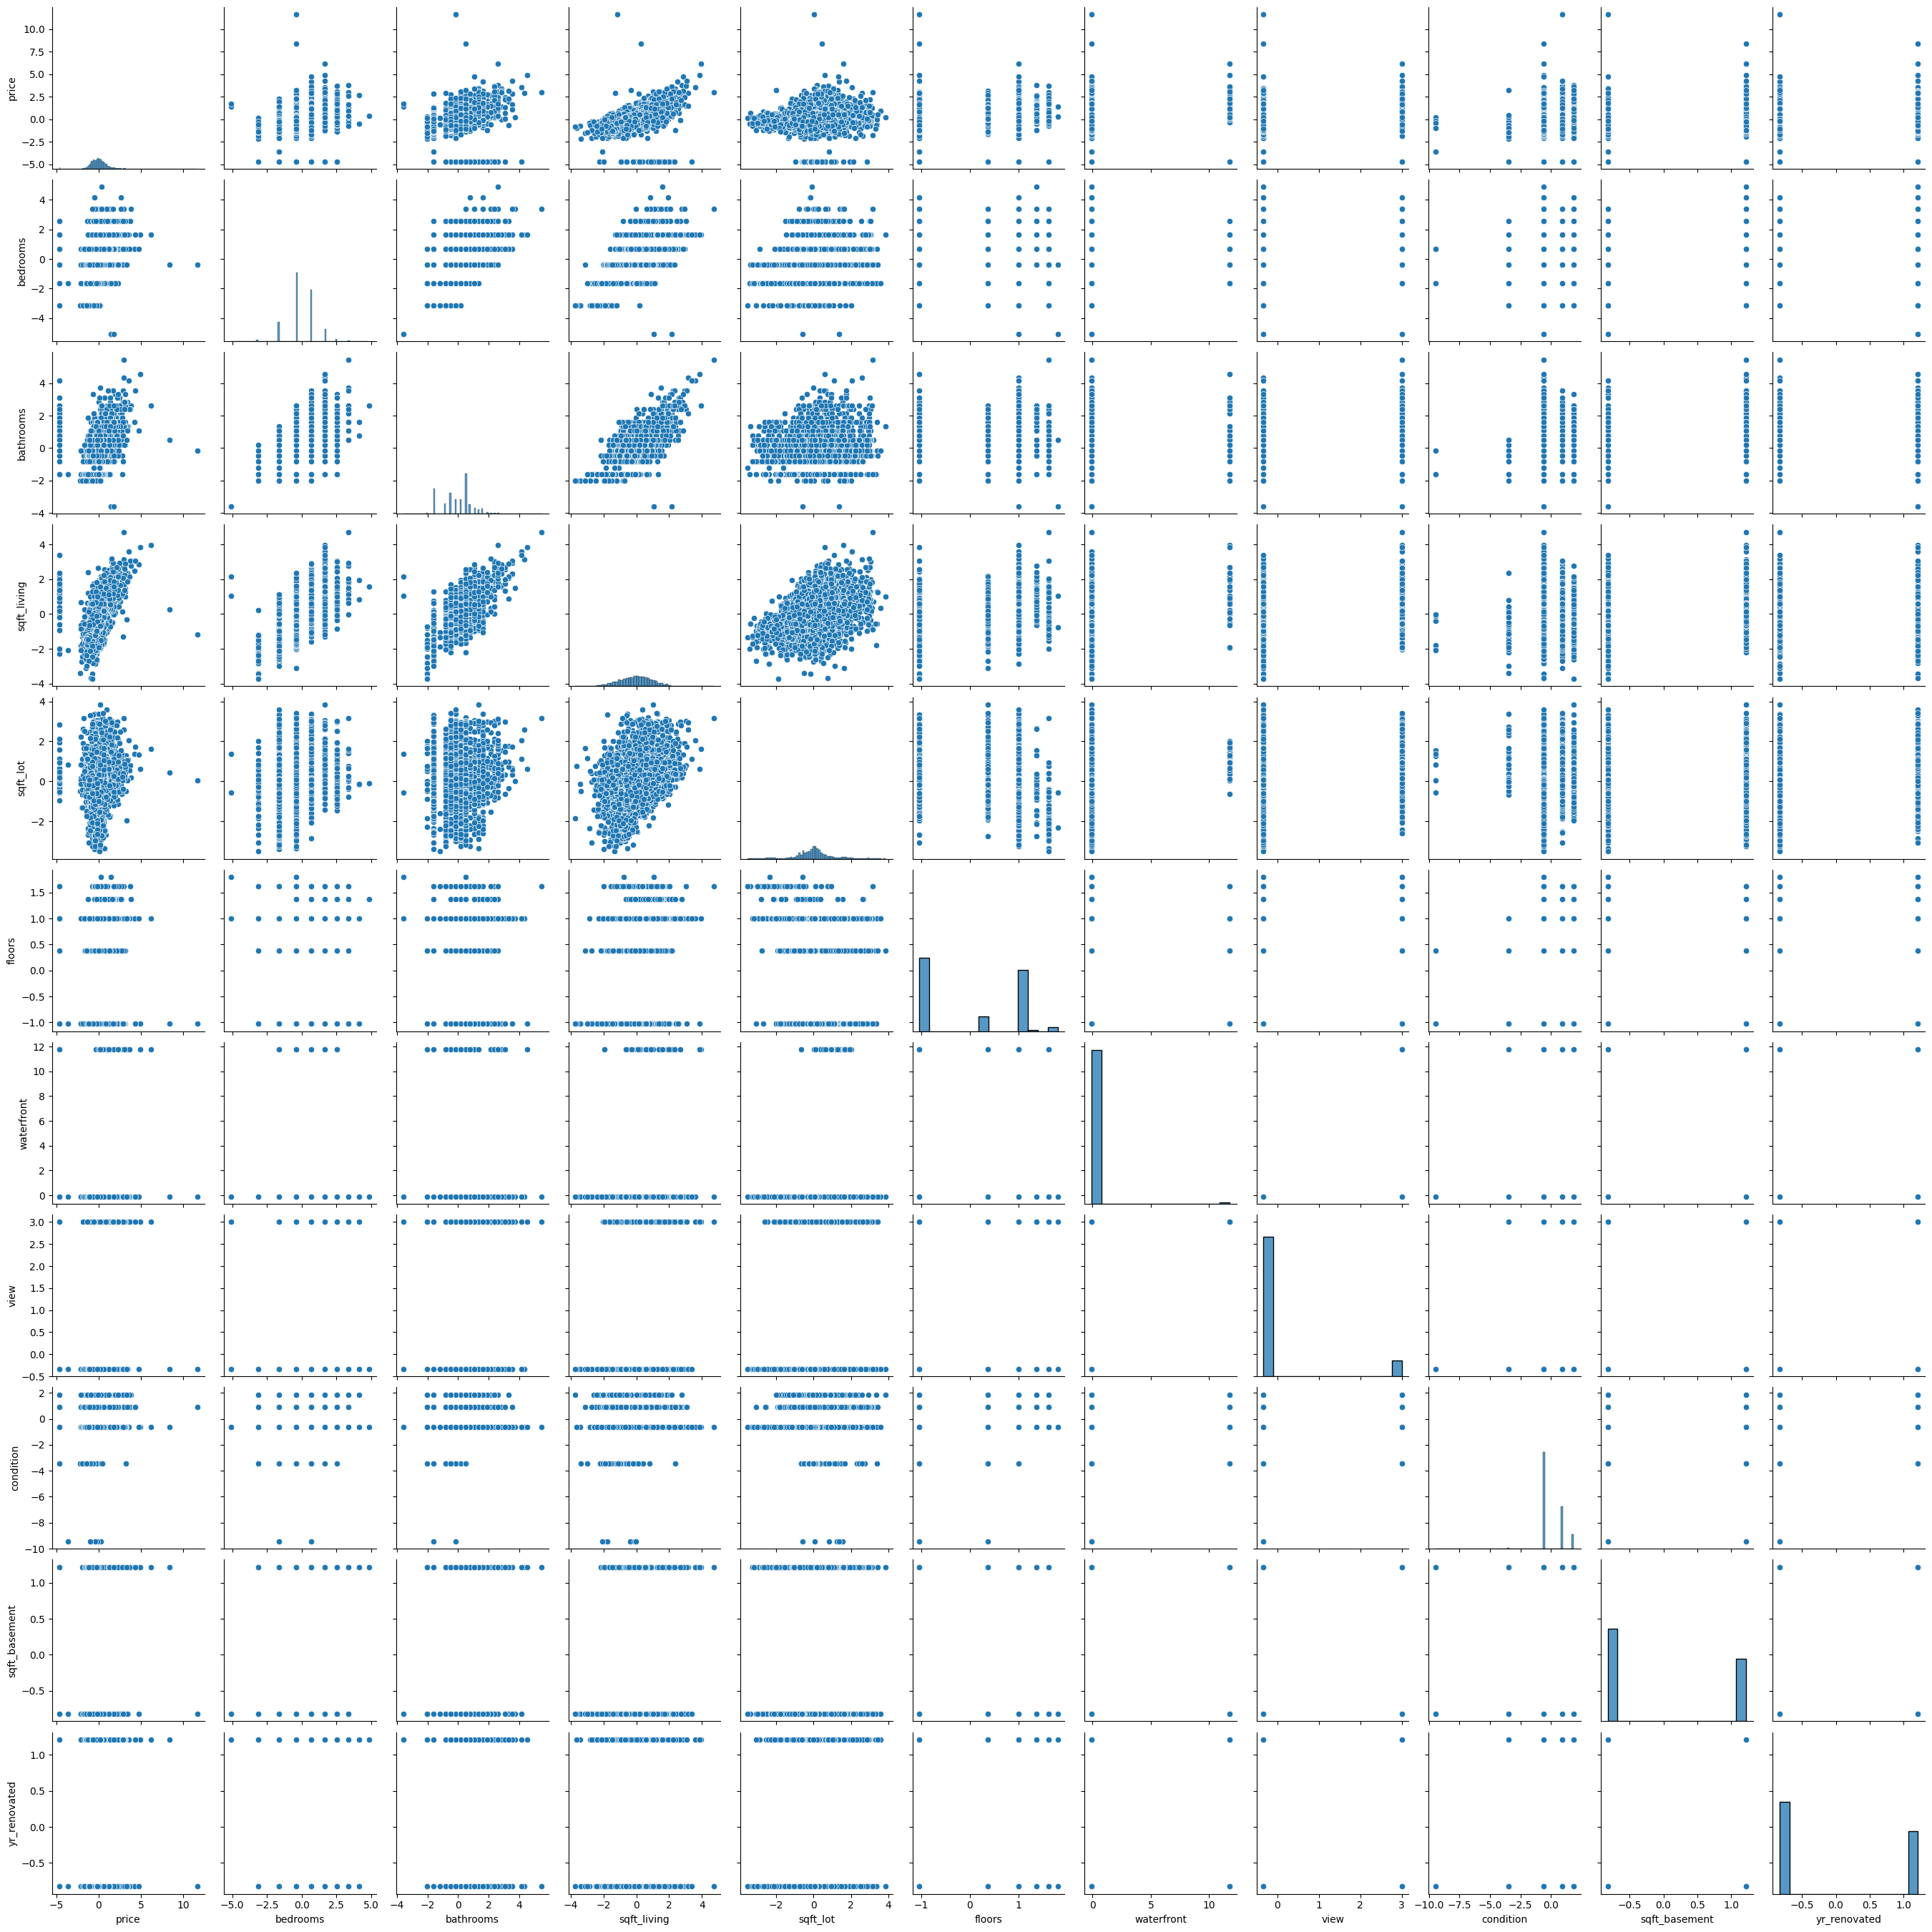

In [46]:
#plotting the processed attributes
sns.pairplot(df[numerical_atts])
plt.show()

The data is much more normally distributed now.

## Applying z-score standardization

In [19]:
#implementing z-score
from scipy.stats import zscore

for _ in numerical_atts:
    df_new[_] = zscore(df_new[_])

C:\Users\purus\Anaconda3\envs\dragon\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


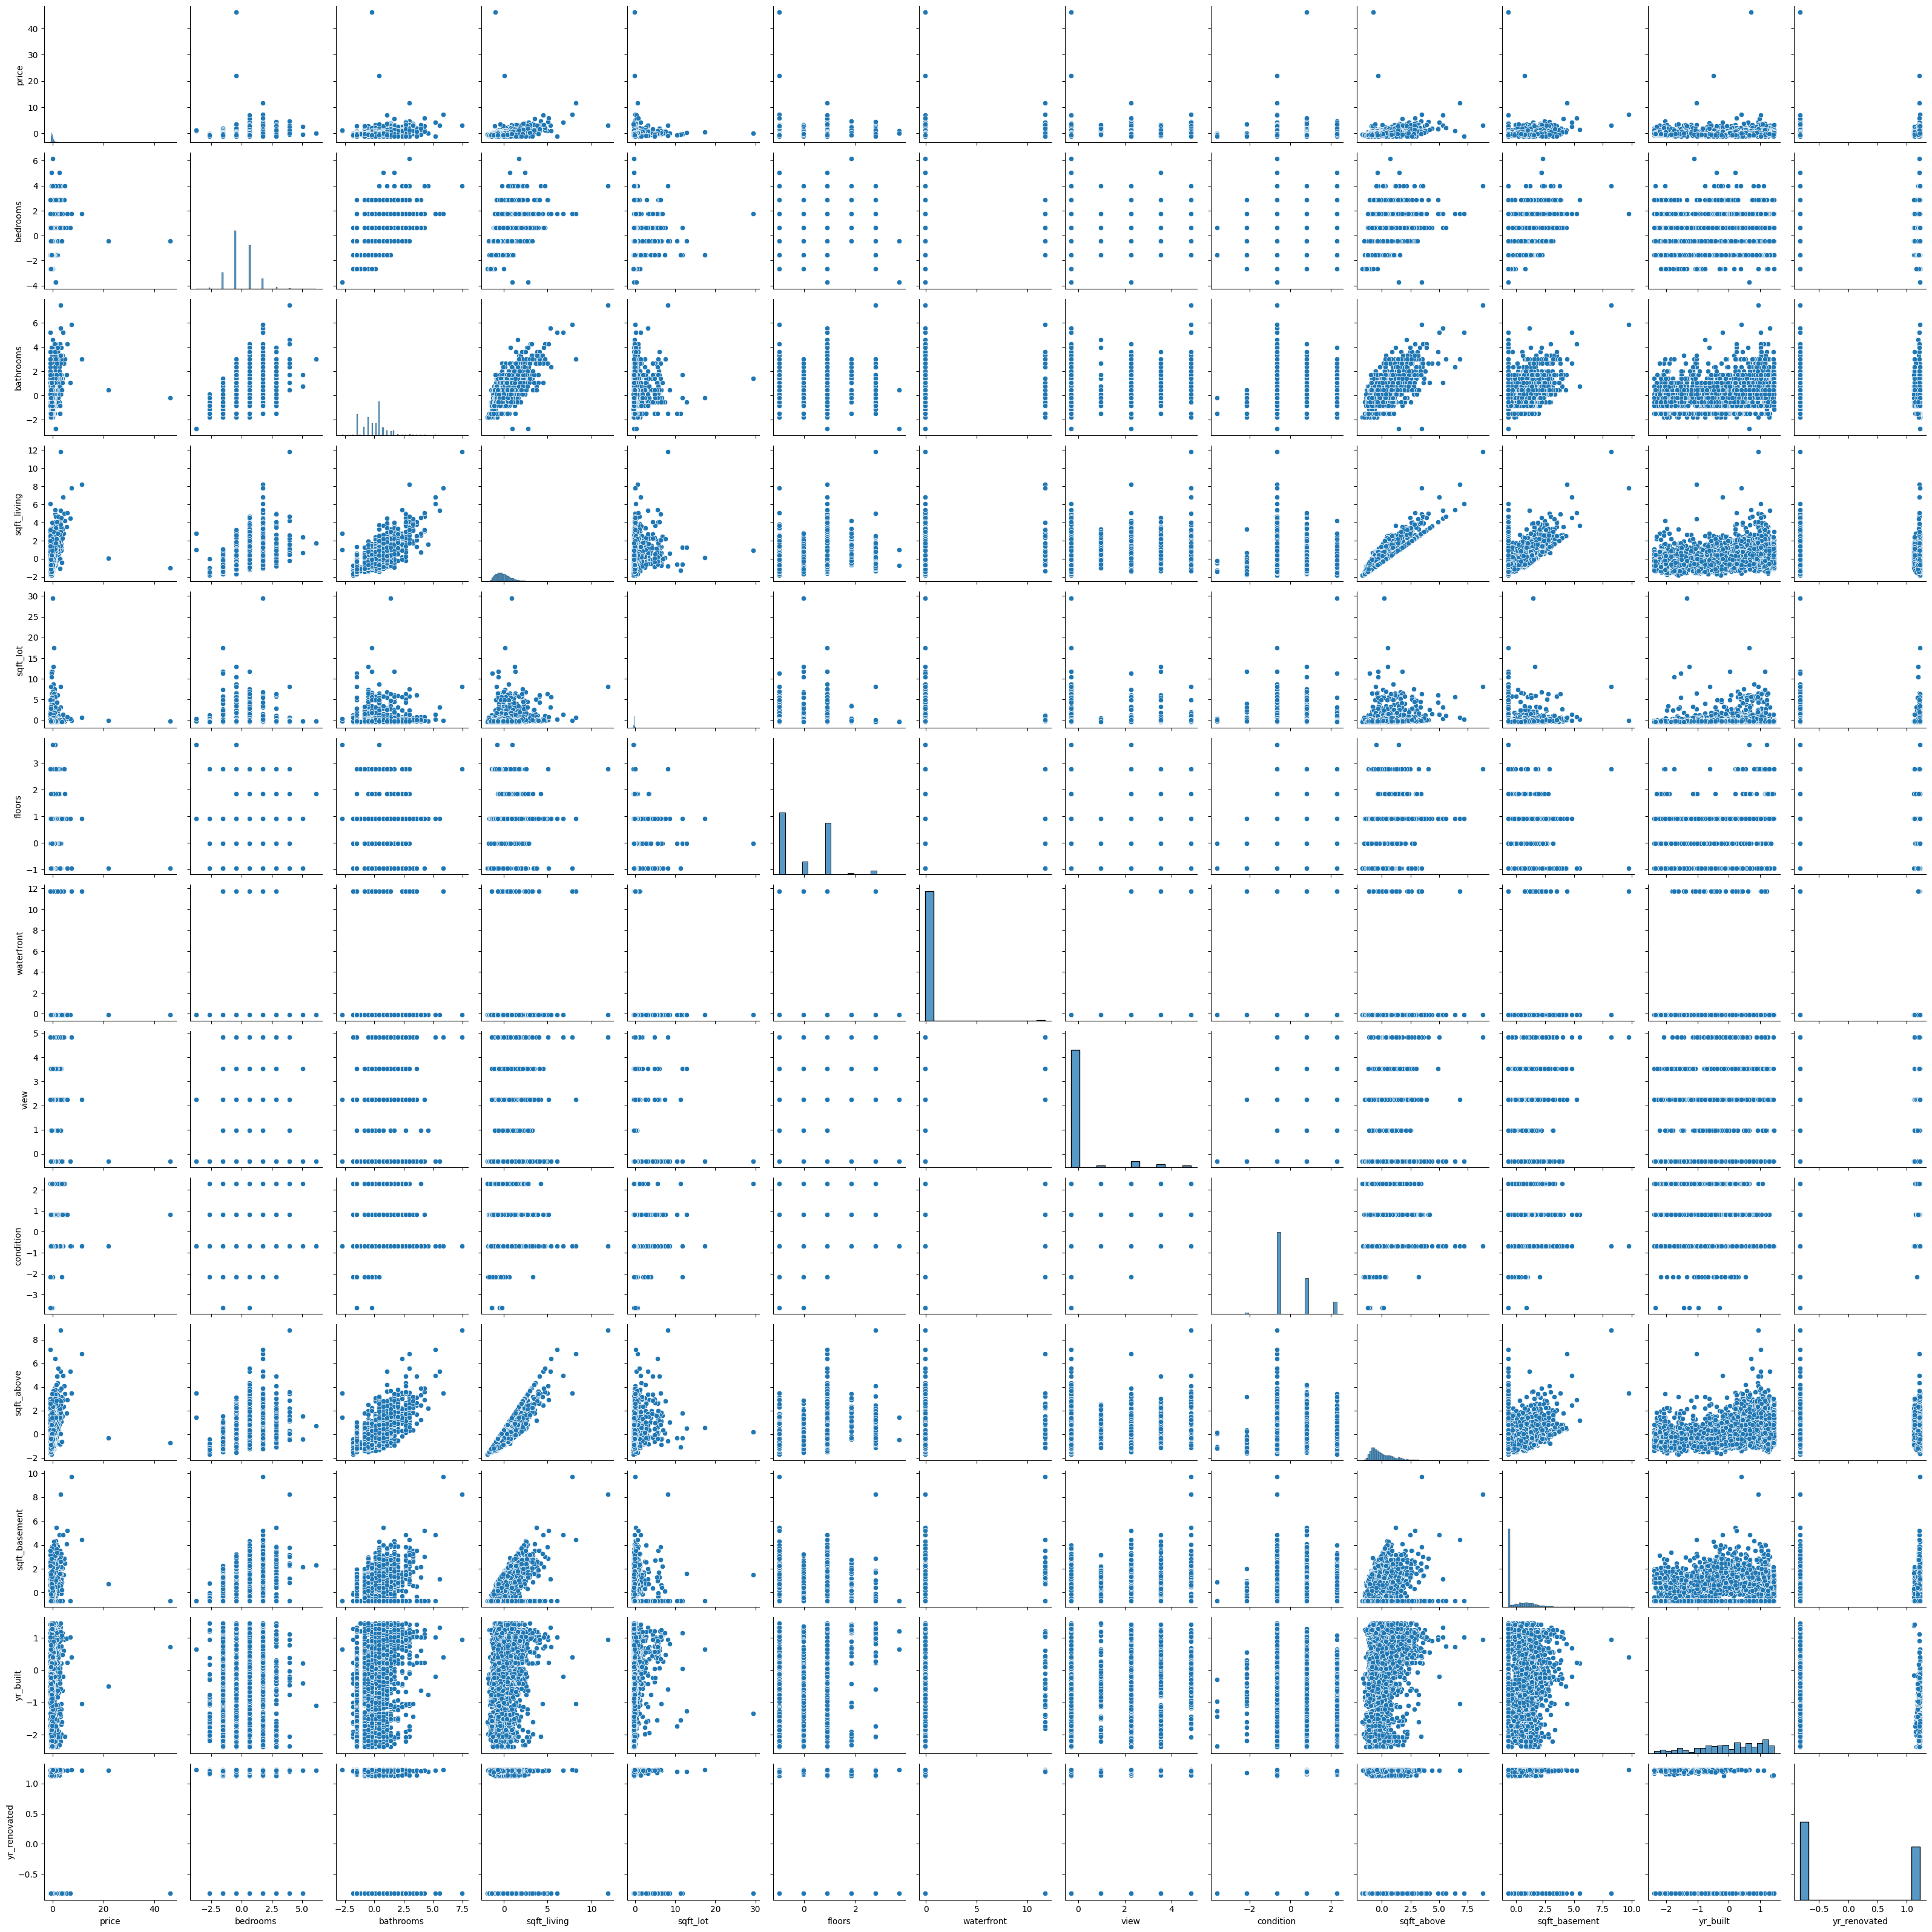

In [20]:
sns.pairplot(df_new[numerical_atts])
plt.show()

## Applying min-max normalization

In [22]:
#implementing min-max
from sklearn.preprocessing import MinMaxScaler

df_new2[numerical_atts] = pt.fit_transform(df_new2[numerical_atts])

C:\Users\purus\Anaconda3\envs\dragon\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


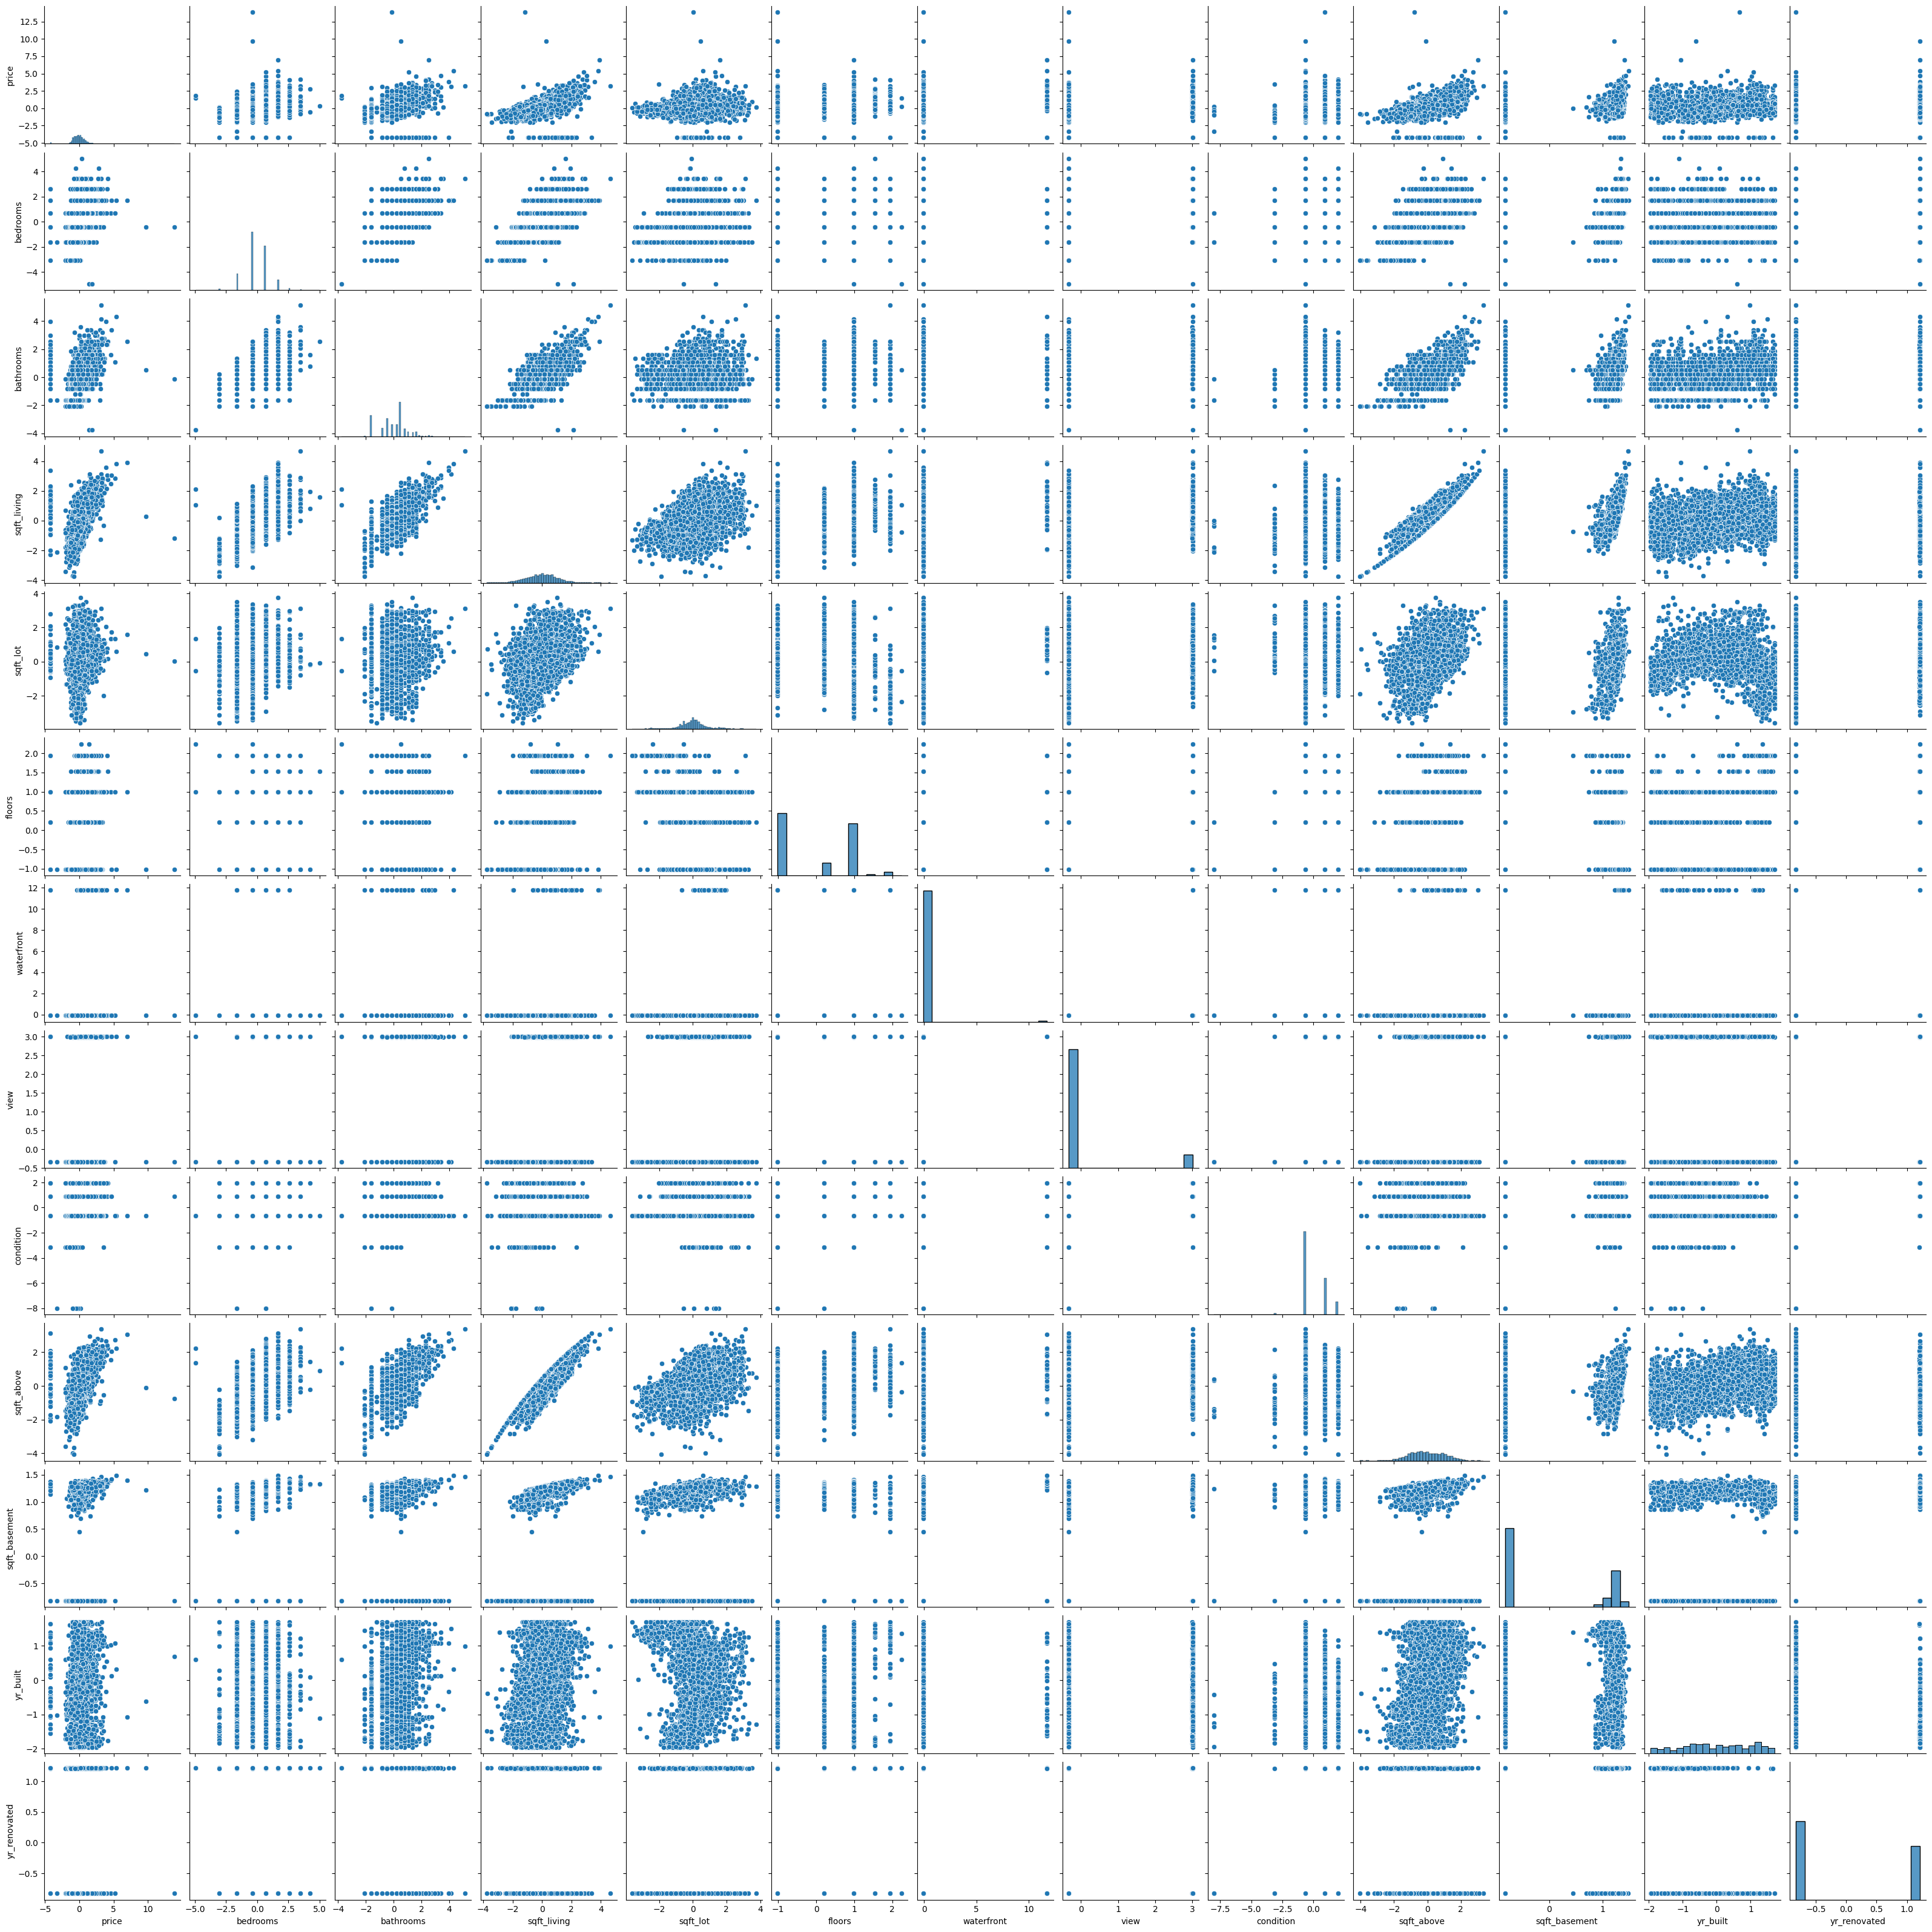

In [23]:
sns.pairplot(df_new2[numerical_atts])
plt.show()

We can clearly see that z-score normalization preserves the underlying statistical distribution wheresas min-masx scaler does not do that. It simply scales the data down to the range of 0 to 1.

# End